<a href="https://colab.research.google.com/github/nbeck2035/CS-260/blob/main/Project_Carlucci_Beck_Riccardelli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### CS 260 Project - Fall 2021
---

# NBA Statistics 2021



### By: Jayden Carlucci, Nolan Beck, and Louis Riccardelli


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

## 1. Introduction:




What variables are associated with better gameplay statistics?

We plan to ask these questions: 

1. How did NBA teams shoot for the 2021 season?
1. How has the number one team in this 2021 season performed compared to itself the past five years in the categories of TRB, AST, STL, BLK, and PTS?
1. What statistic ties the most into effective field goal percentage?
1. Does higher field goal percentage correlate into a higher amount of wins?
1. Do players with a high number of steals also have a high number of assists?
1. What is the impact of total games played on the shooting percentage for those players with more than 50 games played?



---

## 2. Data

A direct link to the data can be found at the following website: 
 * https://www.basketball-reference.com/leagues/NBA_2021_per_game.html
 
While 100% accuracy cannot be certain, the data undergoes a vetting process for accuracy and is updated when official NBA statstical changes are released, so we deem it to be highly trustworthy for the scope of this project.  This website is generally regarded very highly by its users, who range from professional data scientists to sports television personalities to YouTube content creators.

In [13]:
basketball = pd.read_csv("https://raw.githubusercontent.com/nbeck2035/CS-260/main/Basketball3.csv") #load data into a data frame
basketball = basketball.drop(columns=["Rk"])
basketball

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa\achiupr01,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,0.0,0.0,0.000,2.0,3.7,0.546,0.544,0.9,1.8,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams\adamsja01,PG,24,MIL,7,0,2.6,0.1,1.1,0.125,0.0,0.3,0.000,0.1,0.9,0.167,0.125,0.0,0.0,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams\adamsst01,C,27,NOP,58,58,27.7,3.3,5.3,0.614,0.0,0.1,0.000,3.3,5.3,0.620,0.614,1.0,2.3,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo\adebaba01,C,23,MIA,64,64,33.5,7.1,12.5,0.570,0.0,0.1,0.250,7.1,12.4,0.573,0.571,4.4,5.5,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge\aldrila01,C,35,TOT,26,23,25.9,5.4,11.4,0.473,1.2,3.1,0.388,4.2,8.3,0.505,0.525,1.6,1.8,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,Delon Wright\wrighde01,PG,28,SAC,27,8,25.8,3.9,8.3,0.462,1.2,3.1,0.398,2.6,5.3,0.500,0.536,1.1,1.3,0.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0
701,Thaddeus Young\youngth01,PF,32,CHI,68,23,24.3,5.4,9.7,0.559,0.2,0.7,0.267,5.3,9.1,0.580,0.568,1.0,1.7,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
702,Trae Young\youngtr01,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,2.2,6.3,0.343,5.6,11.3,0.491,0.499,7.7,8.7,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
703,Cody Zeller\zelleco01,C,28,CHO,48,21,20.9,3.8,6.8,0.559,0.1,0.6,0.143,3.7,6.2,0.598,0.565,1.8,2.5,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4


In [14]:
standings = pd.read_csv("https://raw.githubusercontent.com/nbeck2035/CS-260/main/standings.csv") #load data into a data frame
standings = standings.drop(columns=["GB" , "W/L%" , "PS/G" , "PA/G" , "SRS"])
standings = standings.sort_values('Eastern Conference' , ascending= True)
standings

,Eastern Conference,W,L,conference
4,Atlanta Hawks*,41,31,eastern
6,Boston Celtics*,36,36,eastern
1,Brooklyn Nets*,48,24,eastern
9,Charlotte Hornets,33,39,eastern
10,Chicago Bulls,31,41,eastern
12,Cleveland Cavaliers,22,50,eastern
19,Dallas Mavericks*,42,30,western
17,Denver Nuggets*,47,25,western
14,Detroit Pistons,20,52,eastern
22,Golden State Warriors,39,33,western


In [15]:
philly_stats = pd.read_csv("https://raw.githubusercontent.com/nbeck2035/CS-260/main/Philadelphia_76ers_Stats.csv") #load data into a data frame
philly_stats

,Unnamed: 0,Total Rebounds Per Game,Assists Per Game,Blocks Per Game,Turnovers Per Game,Pts Per Game
0,2020-2021,56.7,32.5,11.3,8.2,147.5
1,2019-2020,56.2,31.3,9.3,7.8,129.4
2,2018-2019,45.0,26.9,7.3,5.0,103.1
3,2017-2018,59.1,29.4,9.2,7.3,136.6
4,2016-2017,51.0,20.9,9.5,7.9,113.3


### 2.1 Variables Explained

Below is a list of each variable in the dataset and its explanation.

* **RK:** The player's rank for a selected statistic compared to the other players in the dataset
* **Player:** The player's name
* **POS:** The player's position.  Positions are C (Center), PG (Point Guard), PF (Power Forward), SG (Shooting Guard), and SF (Small Forward)
* **AGE:** The player's age
* **TM:** What team the player is associated with
* **G:** The player's total number of games played throughout the season
* **GS:** The player's total number of games started throughout the season
* **MP:** The player's average number of minutes played per game
* **FG:** The player's average number of field goals made per game
* **FGA:** The player's average number of field goals attempted per game
* **FG%:** The player's average field goal shot make percentage per game
* **3P:** The average number of 3 point shots a player has made per game
* **3PA:** The average number of 3 point shots a player has attempted per game
* **3P%:** The player's average 3 point shot make percentage per game
* **2P:** The average number of 2 point shots a player has made per game
* **2PA:** The average number of 2 point shots a player has attempted per game
* **2P%:** The player's average 2 point shot make percentage per game
* **eFG%:** The player's average effective field goal percentage per game.  This statistic weighs and combines a player's FG% with his FT%
* **FT:** The player's average number of free throws made per game
* **FTA:** The player's average number of free throws attempted per game
* **FT%:** The player's average free throw percentage per game
* **ORB:** The player's average number of offensive rebounds per game
* **DRB:** The player's average number of defensive rebounds per game
* **TRB:** The player's average number of total rebounds per game
* **AST:** The player's average number of assists per game
* **STL:** The player's average number of steals per game
* **BLK:** The player's average number of blocks per game
* **TOV:** The player's average number of turnovers per game
* **PF:** The player's average number of personal fouls per game
* **PTS:** The player's average number of points per game



---

## 3. Initial Analysis 

# Question 1

(array([2., 1., 2., 0., 4., 8., 3., 4., 4., 1., 1., 0., 1., 0.]),
 array([0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
        0.56, 0.57, 0.58, 0.59]),
 <a list of 14 Patch objects>)

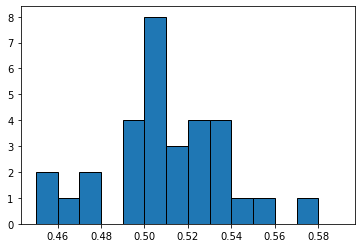

In [28]:
#Viz for 1. team shooting percentage distribution
grpd_teams = basketball.groupby("Tm").mean()
plt.hist(grpd_teams["eFG%"], edgecolor = 'black', 
bins = np.arange(0.45, 0.60, 0.01))

This histogram confirms what we already predicted, that most teams average around 50% for eFG%.  We see that the plurality of teams are clustered in the range [0.50, 0.51). 

# Question 2

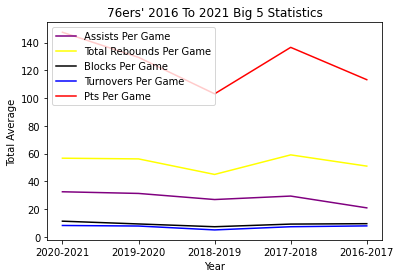

In [29]:
#Viz for 2. Philadelphia 76ers compared to its past self
plt.title("76ers' 2016 To 2021 Big 5 Statistics")     
plt.xlabel('Year')                     	
plt.ylabel('Total Average')
plt.plot(philly_stats['Unnamed: 0'],philly_stats['Assists Per Game'],color="purple")
plt.plot(philly_stats['Unnamed: 0'],philly_stats['Total Rebounds Per Game'],color="yellow")
plt.plot(philly_stats['Unnamed: 0'],philly_stats['Blocks Per Game'],color="Black")
plt.plot(philly_stats['Unnamed: 0'],philly_stats['Turnovers Per Game'],color="Blue")
plt.plot(philly_stats['Unnamed: 0'],philly_stats['Pts Per Game'],color="red")
plt.legend(["Assists Per Game","Total Rebounds Per Game","Blocks Per Game","Turnovers Per Game", "Pts Per Game"],loc=2)

The line graph above shows the Phillidelphia 76ers' total average of the following five statistics throughout the past five years: Assists Per Game, Total Rebounds Per Game, Blocks Per Game, Turnovers Per Game, and Points Per Game. These five statistics are the most important in basketball when determining a teams level of skill and to track team progress. It is clear the 76ers' Points Per Game flucuates the most. Total Rebounds Per Game flucuates second most. Assists Per Game have had a slight decrease from the 2017 to 2021 seaoson. Turnovers Per Game and Blocks Per Game have stayed most consistent over the past 5 seasons. This graph is important to track team progress and determine areas that need to be improved upon for the following years.

# Question 3

In [21]:
#Code for 3. eFG% correlating variables
efg_corr = basketball.corr()[["eFG%"]]
efg_corr = efg_corr.reset_index().rename(columns={"index":"Metrics",  "eFG%":"Correlation with eFG%"})
efg_corr = efg_corr.sort_values(by="Correlation with eFG%", ascending=False)
efg_corr
#https://www.w3schools.com/python/python_ml_multiple_regression.asp

,Metrics,Correlation with eFG%
13,eFG%,1.000000
6,FG%,0.923113
12,2P%,0.707730
9,3P%,0.468365
1,G,0.357048
4,FG,0.330147
19,TRB,0.324064
10,2P,0.313453
25,PTS,0.306018
3,MP,0.304398


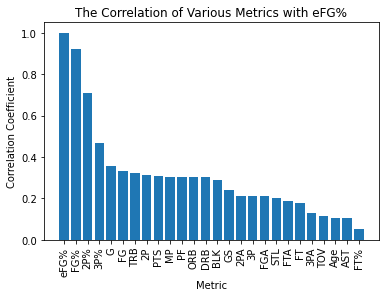

In [26]:
#Bar chart for eFG% correlating values
plt.bar(efg_corr["Metrics"], efg_corr["Correlation with eFG%"])
plt.title("The Correlation of Various Metrics with eFG%")
plt.xlabel("Metric")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation = 90);

Looking at the correlation coefficients of all of the various variables with eFG%, we see some interesting results. It makes sense that FG%, 2P%, and 3P% are correlated very highly, as those all directly tie into eFG%. The fact that PTS has a relatively weak linear relationship, but one that is positive, is also relatively intuitive for someone familiar with basketball. However, it is very surprising to see that variable with the weakest correlation coefficient is FT%, as one would hypothesize that a good free throw shooter would also be a very good shooter in general, and a poor free throw shooter would be a very poor shooter in general. Yet that is not fully borne out in reality.

# Question 4

In [41]:
# Code for number 4. Does higher field goal percentage correlate into a higher amount of wins?
standings['FG%'] = np.array([43.17, 47.10 , 43.44, 46.29, 45.55, 42.14, 44.20 , 43.28, 46.29 , 44.55, 42.27, 44.28, 45.06, 47.32 , 44.25, 49.19, 43.61, 45.00, 40.32, 40.41, 44.39, 41.83, 40.18, 46.40, 44.12, 44.95, 47.08, 47.15, 44.71, 44.44])
standings

,Eastern Conference,W,L,conference,FG%
4,Atlanta Hawks*,41,31,eastern,43.17
6,Boston Celtics*,36,36,eastern,47.10
1,Brooklyn Nets*,48,24,eastern,43.44
9,Charlotte Hornets,33,39,eastern,46.29
10,Chicago Bulls,31,41,eastern,45.55
12,Cleveland Cavaliers,22,50,eastern,42.14
19,Dallas Mavericks*,42,30,western,44.20
17,Denver Nuggets*,47,25,western,43.28
14,Detroit Pistons,20,52,eastern,46.29
22,Golden State Warriors,39,33,western,44.55


In [42]:
Team_fg = basketball.groupby('Tm').mean()
Team_fg = Team_fg['FG%'] *100
Team_fg 

Tm
ATL    43.172222
BOS    47.100000
BRK    43.444444
CHI    45.554545
CHO    46.288235
CLE    42.144000
DAL    44.200000
DEN    43.280952
DET    46.290476
GSW    44.516667
HOU    42.273333
IND    44.280000
LAC    45.060000
LAL    47.321053
MEM    44.250000
MIA    49.190476
MIL    43.613636
MIN    45.000000
NOP    40.319048
NYK    40.415789
OKC    44.390909
ORL    41.832143
PHI    40.182609
PHO    46.400000
POR    44.123529
SAC    44.954167
SAS    47.077778
TOR    47.150000
TOT    44.654430
UTA    44.711111
WAS    44.442857
Name: FG%, dtype: float64

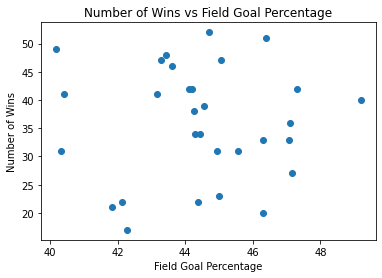

In [43]:
plt.scatter(standings["FG%"], standings["W"])
plt.xlabel("Field Goal Percentage")
plt.ylabel("Number of Wins")
plt.title("Number of Wins vs Field Goal Percentage");

The scatter plot above possibly shows a visual correlation between the number of wins and the field goal percentage besides a few outliers. It appears that teams with a higher field goal percentage tend to be on the higher end of the wins spectrum while team with lower field goal percentage had less wins. Nonetheless, further analysis is needed to come to a complete conclusion on the matter.

# Question 5

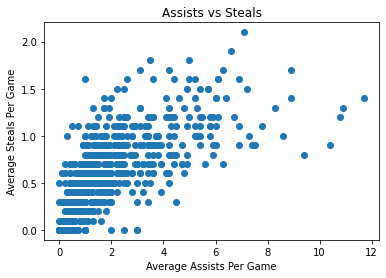

In [39]:
#Viz for 5. correlation between assists and steals
plt.scatter(basketball["AST"], basketball["STL"])
plt.title("Assists vs Steals")
plt.xlabel("Average Assists Per Game")
plt.ylabel("Average Steals Per Game");

In [40]:
assists_steals = basketball[["AST", "STL"]]
corr_df = assists_steals.corr()
corr_df

,AST,STL
AST,1.000000,0.680935
STL,0.680935,1.000000


This scatter plot and the accompanying correlation coefficient of 0.680935 demonstrate that there is a positive and linear relationship between the average number of steals per game and the average number of assists per game for a given individual player. That answers our original question, as it is clear that some sort of correlation exists. Moving forward, we may break it down by position to see how that affects things (i.e., maybe point guards tend to have more of each because of the nature of the position).

# Question 6

In [34]:
#Code for 6. What is the impact of total games played on the shooting percentage for those players with more than 50 games played?
over_50_games = (basketball["G"] > 50)
over_50_games = basketball[over_50_games]
over_50_games 

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa\achiupr01,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,0.0,0.0,0.000,2.0,3.7,0.546,0.544,0.9,1.8,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
2,Steven Adams\adamsst01,C,27,NOP,58,58,27.7,3.3,5.3,0.614,0.0,0.1,0.000,3.3,5.3,0.620,0.614,1.0,2.3,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo\adebaba01,C,23,MIA,64,64,33.5,7.1,12.5,0.570,0.0,0.1,0.250,7.1,12.4,0.573,0.571,4.4,5.5,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
10,Jarrett Allen\allenja01,C,22,TOT,63,45,29.6,4.7,7.7,0.618,0.1,0.3,0.316,4.6,7.3,0.631,0.624,3.2,4.6,0.703,3.1,6.9,10.0,1.7,0.5,1.4,1.6,1.5,12.8
12,Jarrett Allen\allenja01,C,22,CLE,51,40,30.3,5.0,8.2,0.609,0.1,0.4,0.316,4.9,7.8,0.623,0.616,3.1,4.5,0.690,3.1,6.8,9.9,1.7,0.5,1.4,1.5,1.5,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,Zion Williamson\willizi01,PF,20,NOP,61,61,33.2,10.4,17.0,0.611,0.2,0.6,0.294,10.2,16.4,0.622,0.616,6.0,8.7,0.698,2.7,4.5,7.2,3.7,0.9,0.6,2.7,2.2,27.0
698,Delon Wright\wrighde01,SG-PG,28,TOT,63,39,27.7,3.8,8.2,0.463,1.0,2.7,0.372,2.8,5.5,0.509,0.525,1.6,2.0,0.802,1.0,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2
701,Thaddeus Young\youngth01,PF,32,CHI,68,23,24.3,5.4,9.7,0.559,0.2,0.7,0.267,5.3,9.1,0.580,0.568,1.0,1.7,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
702,Trae Young\youngtr01,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,2.2,6.3,0.343,5.6,11.3,0.491,0.499,7.7,8.7,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3


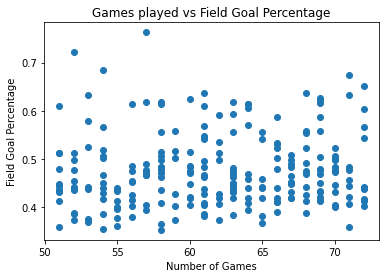

In [44]:
plt.scatter(over_50_games["G"], over_50_games["FG%"])
plt.xlabel("Number of Games")
plt.ylabel("Field Goal Percentage")
plt.title("Games played vs Field Goal Percentage");

Looking at the visualization (here a scatter plot), there is no clear correlation between the number of games played, which in this case is at least 50 games, and the field goal percentage on the season. There are a few points that visually appear to be outliers in the chart, but nothing out of the ordinary.

In [38]:
#Start of code for comparing different positions
#grpd_position = basketball.groupby("Pos").mean()
#grpd_position